In [1]:
%matplotlib inline

In [2]:
import os, sys

from utils import *
from vgg16 import Vgg16

from shutil import copyfile

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
/home/ubuntu/anaconda2/lib/python2.7/site-packages/theano/sandbox/cuda/__init__.py:600: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)
Using Theano backend.


In [3]:
%pwd

u'/home/ubuntu/courses/deeplearning1/wk'

In [4]:
current_dir = os.getcwd()
wk_dir = current_dir
data_dir = current_dir + "/../data/kg/cd-redux"

In [11]:
%cd $data_dir

/home/ubuntu/courses/deeplearning1/data/kg/cd-redux


In [16]:
%%bash
tree -d

.
├── test
└── train

2 directories


In [17]:
%ls -l test | wc -l

12501


In [18]:
%ls -l train | wc -l

25001


In [19]:
%mkdir -p train/cats
%mkdir -p train/dogs
%mkdir -p valid/cats
%mkdir -p valid/dogs
%mkdir -p test/unknown
%mkdir -p results

%mkdir -p sample/train/cats
%mkdir -p sample/train/dogs
%mkdir -p sample/valid/cats
%mkdir -p sample/valid/dogs

In [20]:
%%bash
tree -d

.
├── results
├── sample
│   ├── train
│   │   ├── cats
│   │   └── dogs
│   └── valid
│       ├── cats
│       └── dogs
├── test
│   └── unknown
├── train
│   ├── cats
│   └── dogs
└── valid
    ├── cats
    └── dogs

16 directories


In [29]:
%cd train

/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/train


In [30]:
g = glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(2000):
    os.rename(shuf[i], data_dir + "/valid/" + shuf[i])

In [34]:
g = glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(200):
    copyfile(shuf[i], data_dir + "/sample/train/" + shuf[i])

In [35]:
%cd $data_dir/valid

/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/valid


In [36]:
g = glob("*.jpg")
shuf = np.random.permutation(g)
for i in range(50):
    copyfile(shuf[i], data_dir + "/sample/valid/" + shuf[i])

In [37]:
%pwd

u'/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/valid'

In [38]:
%cd $data_dir/train
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $data_dir/valid
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $data_dir/sample/train
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

%cd $data_dir/sample/valid
%mv cat.*.jpg cats/
%mv dog.*.jpg dogs/

/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/train
/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/valid
/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/sample/train
/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/sample/valid


In [47]:
%cd $data_dir/test
%mv *.jpg unknown/

/home/ubuntu/courses/deeplearning1/data/kg/cd-redux/test


In [6]:
%cd $wk_dir

/home/ubuntu/courses/deeplearning1/wk


In [7]:
vgg = Vgg16()

32768/35363 [==========================>...] - ETA: 0s

In [9]:
batch_size = 64
batches = vgg.get_batches(data_dir + "/train/", batch_size=batch_size)
val_batches = vgg.get_batches(data_dir + "/valid/", batch_size=batch_size)
vgg.finetune(batches)
vgg.fit(batches, val_batches, nb_epoch=1)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/1
23000/23000 [==============================] - 633s - loss: 0.1243 - acc: 0.9668 - val_loss: 0.0973 - val_acc: 0.9830


In [10]:
vgg = Vgg16()

In [11]:
batches = vgg.get_batches(data_dir + "/train/", batch_size=4)

Found 23000 images belonging to 2 classes.


In [12]:
imgs, labels = next(batches)

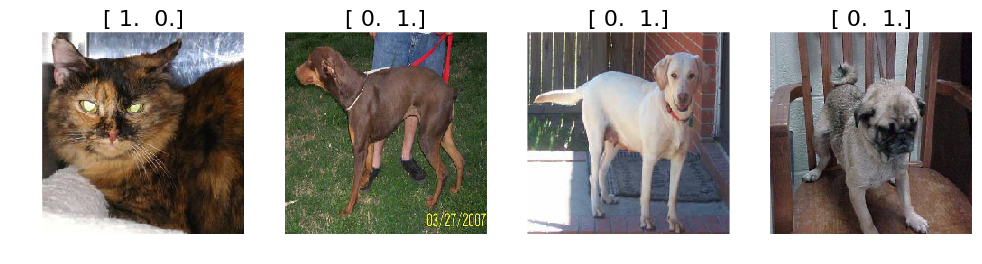

In [13]:
plots(imgs, titles=labels)

In [14]:
vgg.predict(imgs, True)

(array([ 0.468 ,  0.5712,  0.4207,  0.5078], dtype=float32),
 array([281, 211, 208, 174]),
 [u'tabby', u'vizsla', u'Labrador_retriever', u'Norwegian_elkhound'])

In [15]:
vgg.classes[:4]

[u'tench', u'goldfish', u'great_white_shark', u'tiger_shark']